# Yelp Data Challenge - Clustering and PCA



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('/Users/xuejiwang/Downloads/yelp_dataset/last_2_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA


## 1. Cluster the review text data for all the restaurants

### Define feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [5]:
# Make a column and take the values, save to a variable named "target"
df['perfect'] = (df['stars'] > 4)
target = df['perfect']

#### statistic of the target variable

In [8]:
# To be implemented
target.mean()

0.4741461922405801

In [9]:
target.head()

0     True
1     True
2     True
3    False
4     True
Name: perfect, dtype: bool

### Create training dataset and test dataset

In [11]:
from sklearn.cross_validation import train_test_split

In [21]:
# documents is X, target is y
# Now split the data to training set and test set
# Start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = \
train_test_split(documents, target, test_size = 0.96, random_state = 7)


### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [15]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train).todense()

In [16]:
type(vectors_train),vectors_train.shape

(numpy.matrixlib.defmatrix.matrix, (25628, 1000))

In [17]:
# vectors_train = vectorizer.fit_transform(documents_train).array()

In [18]:
# Get the vocab of your tfidf
wordsBag = vectorizer.get_feature_names()

In [19]:
# Use the trained model to transform all the reviews
vectorized_documents = vectorizer.transform(documents).todense()

## Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans()
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
#kmeans = KMeans()
#kmeans.fit(vectors_train)
KMeans().fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all the data

In [25]:
# To be implemented
assigned_cluster = kmeans.predict(vectorized_documents)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [26]:
print(kmeans.cluster_centers_.shape)


(8, 1000)


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [63]:
mostFreq = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1: -mostFreq : -1]

In [68]:
print("top words for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(wordsBag[i] for i in centroid)))

top words for each cluster:
0: place, food, vegas, best, delicious, amazing, love, service, like
1: burger, fries, burgers, good, cheese, place, shake, food, ordered
2: good, food, really, place, service, like, nice, pretty, just
3: great, food, service, place, amazing, friendly, awesome, atmosphere, definitely
4: pizza, crust, good, place, great, cheese, like, pizzas, just
5: chicken, fried, good, rice, food, ordered, place, sauce, like
6: sushi, rolls, place, roll, ayce, great, fresh, good, service
7: food, order, service, time, minutes, just, didn, came, like


#### Try different k
If you set k == to a different number, how does the top features change?

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
assigned_cluster = kmeans.predict(vectorized_documents)

In [70]:
mostFreq = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1: -mostFreq : -1]

In [72]:
print("top words for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(wordsBag[i] for i in centroid)))

top words for each cluster:
0: burger, fries, burgers, good, cheese, place, shake, food, ordered
1: food, order, time, service, just, minutes, like, didn, came
2: good, place, food, chicken, vegas, best, delicious, like, really
3: pizza, crust, good, place, great, cheese, just, like, ordered
4: great, food, service, place, amazing, good, friendly, awesome, staff


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [73]:
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4], dtype=int32)

In [75]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review_index in sample_reviews:
        print("    %s" % df.ix[review_index]['stars'],)
        print("    %s" % df.ix[review_index]['text'])
    print

cluster 0:
    5
    Came here on a Sunday afternoon with my daughter. We ordered the single veggie burger with cheese, fried zucchini, and the cilantro chicken salad with the tumeric dressing. We both enjoyed it thorougly ans the food came quick. The service was fast and the cashiers were friendly. 

I am happy to find this alternative place to eat at instead of the other joints. I'll be making my way here alot more frequently. 

We need more places like this in Vegas, everyone needs to come here to support.  :-)
    1
    THE worst place ever sorry Guy I love you, but this was awful. I looked at the menu before we got there and it looked good....so first off we get there they have no nachos (their seasonal) WTF....second I order a turkey burger and they have no more turkey Ridiculous! And lastly I order hot wings which is my favorite but I wanted something else...the menu said larger wings (I wonder how small they were before) because mines was baby Cornish hens size lbvs...I then as

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [76]:
# Find the business who got most reviews, get filtered df, name it df_top_restaurant
most_reviewed = df['business_id'].value_counts().index[0]

In [77]:
df_most_reviewed = df[df['business_id'] == most_reviewed]

In [78]:
df_top_restaurant = df_most_reviewed.reset_index()

In [79]:
df_top_restaurant.head()

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,perfect
0,283639,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-09-16,0,gkcPdbblTvZDMSwx8nVEKw,5,Got here early on football Sunday 7:30am as I ...,0,SKteB5rgDlkkUa1Zxe1N0Q,True
1,283640,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-09,0,mQfl6ci46mu0xaZrkRUhlA,5,"This buffet is amazing. Yes, it is expensive,...",0,f638AHA_GoHbyDB7VFMz7A,True
2,283641,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-02-08,0,lMarDJDg4-e_0YoJOKJoWA,2,This place....lol our server was nice. But fo...,0,A21zMqdN76ueLZFpmbue0Q,False
3,283642,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-12-22,0,30xmXTzJwHPcqt0uvSLQhQ,3,One star knocked off for the cold air conditio...,0,uNHEnP28MMmVy96ZSJKaMA,False
4,283643,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-02-21,0,g8ojbzP1xoX9dbDfQv2KJw,5,Miche better experience this time around. We w...,0,3cZPpN-IrA8CSc5PkZLbXA,True


#### Load restaurant profile information from the business dataset

In [80]:
# Load business dataset (optional)

import json
import pandas as pd

file_business = '/Users/xuejiwang/Downloads/yelp_dataset/yelp_academic_dataset_business.json'
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)


In [81]:
df_business.shape

(188593, 15)

In [82]:
# Take a look at the most reviewed restaurant's profile (optional)
df_most_reviewed = df_business[df_business['business_id'] == most_reviewed ]

In [83]:
df_most_reviewed['categories'].values

array(['Sandwiches, Buffets, Breakfast & Brunch, Food, Restaurants'],
      dtype=object)

In [84]:
df_most_reviewed['attributes'].values

array([{'Alcohol': 'full_bar', 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}", 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': True}", 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': "{'dessert': True, 'latenight': False, 'lunch': True, 'dinner': True, 'breakfast': False, 'brunch': True}", 'HasTV': 'False', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '3', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'True', 'RestaurantsTakeOut': 'False', 'WheelchairAccessible': 'True', 'WiFi': 'no'}],
      dtype=object)

### Vectorize the text feature

In [85]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values

In [86]:
documents_top_restaurant.dtype

dtype('O')

In [87]:
documents_top_restaurant.shape

(4923,)

In [88]:
documents_top_restaurant[:5]

array(["Got here early on football Sunday 7:30am as I wanted to start the day off right. Heard this was the best buffet in town besides Bally's hotel . So upon entering the buffet there was no line or wait. Hostess was nice giving us the once around tour because it was our 1st time. The food looked incredible and my mouth was salivating to try it all. I'm the type of person that my first go round is to try it phase then the next time , and the next time I Attack !! Steak and eggs were bomb , omelet was on hit too. Red velvet pancakes yum . Had problems with the country fried potatoes but the onion rings made up for it.                                             Not a big fan of the champagne and orange juice so I instead opted to order the bottomless beer  Yeee !! Sea food was incredible and made sure I did damaged there also. Made a pit stop for the food truck type tacos . Brought it home with the desserts ! Well rounded buffet really , really enjoyed it . Some yelpers I see complain

### Define target variable for later classification

#### Again, look at perfect (5 stars) and imperfect (1-4 stars) rating

In [89]:
# To be implemented
df_top_restaurant['perfect'] = (df_top_restaurant['stars'] > 4)
target_top_restaurant = df_top_restaurant['perfect'].values.astype(int)

In [90]:
target_top_restaurant

array([1, 1, 0, ..., 1, 0, 0])

#### Check the statistic of the target variable

In [91]:

target_top_restaurant.mean()

0.38939670932358317

In [92]:
documents_top_restaurant.shape, target_top_restaurant.shape

((4923,), (4923,))

### Create training dataset and test dataset

In [107]:
from sklearn.cross_validation import train_test_split

In [109]:
# documents_top_restaurant is X, target_top_restaurant is y
# Now split the data to training set and test set
# Now data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
X_train, X_test, y_train, y_test = \
train_test_split(documents_top_restaurant, target_top_restaurant, test_size = 0.95, random_state = 7)



### Get NLP representation of the documents

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [112]:
# Train the model with training data
vectors_train = vectorizer.fit_transform(X_train).toarray()

In [113]:
vectors_train.shape

(246, 1000)

In [114]:
# Get the vocab of tfidf
wordsBag = vectorizer.get_feature_names()

In [116]:
# Use the trained model to transform the test data
vectors_test = vectorizer.transform(X_test).todense()

In [117]:
# Use the trained model to transform all the data
vectors_documents_top_restaurant = vectorizer.transform(documents_top_restaurant).todense()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [118]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all  data

In [119]:
assigned_cluster = kmeans.predict(vectors_documents_top_restaurant)

#### Inspect the centroids

In [120]:
# To be implemented
print('Cluster centers:')
print(kmeans.cluster_centers_.shape)

Cluster centers:
(5, 1000)


#### Find the top 10 features for each cluster.

In [121]:
mostFreq = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-mostFreq : -1]

In [124]:
print("top words for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(wordsBag[i] for i in centroid)))

top words for each cluster:
0: buffet, best, food, vegas, great, amazing, service, las, definitely
1: buffet, eat, worth, price, dinner, salty, money, 10, seafood
2: crab, place, good, legs, buffet, just, like, food, seafood
3: buffet, food, fresh, section, definitely, station, vegas, little, favorite
4: line, food, wait, just, long, buffet, pay, price, good


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [125]:
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4], dtype=int32)

In [132]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, documents_top_restaurant.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print("cluster %d:" % i)
    for review_index in sample_reviews:
        print("    %s" % df.ix[review_index]['stars'],)
        print("    %s" % df.ix[review_index]['text'])
    print

cluster 0:
    1
    Yikes! The Orleans Casino and Boyd spent 4.5 million dollars completely renovating the buffet, changing the name, layout and everything. I was super excited when I got a coupon for 2 free buffets and couldn't wait to give their new buffet a try.

Lets just say I'm glad I didn't pay for this. 

On my first plate I tried their cheese enchilada (because how in the heck can you mess that up), rice and a few pieces of sushi. The sushi was inedible, falling apart, dry and fishy. The enchilada was over-cooked, falling apart and to say it was salty would be understating the salinity of this abomination. The rice, surprisingly crunchy.

I had literally one bite of everything and ditched the plate. I thought for sure our server was going to kick me out or something for throwing out an entire plate of food, but thankfully he didn't say anything.

Round 2: I tried the steak, a salad, some chow mein, and cheese ravioli with marinara. 

So I ended up eating the salad for dinner 

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(vectors_train)
X_test_scaled = scaler.fit_transform(vectors_test)


### Use PCA to transform data (train and test) and get princial components

In [ ]:
from sklearn.decomposition import PCA

# Let's pick a n_components
number_components = 50
pca = PCA(n_components = number_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

##### Dimension reduction by PCA

In [139]:
X_train_pca.shape, pca.components_.shape

((246, 50), (50, 1000))

### See how much (and how much percentage of) variance the principal components explain

In [136]:
print(pca.explained_variance_[:10])

[15.46433742 13.76232478 11.40137861 10.7633782  10.15840543  9.48891441
  9.44560769  9.23750405  9.02863531  8.78504816]


In [141]:
print(pca.explained_variance_ratio_[1:10])

[0.01370638 0.01135503 0.01071962 0.01011711 0.00945034 0.00940721
 0.00919995 0.00899193 0.00874934]


### Visualization: plot proportion of variance explained with top principal components


In [ ]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

Text(0,0.5,'Variance Explained')

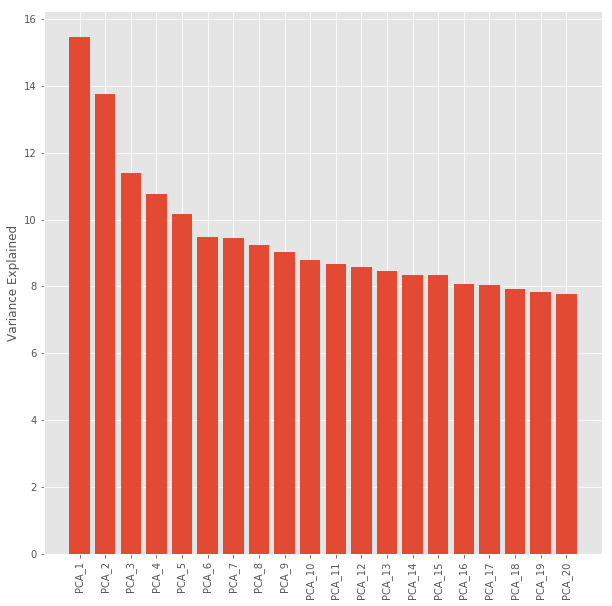

In [148]:
plt.figure(figsize = (10,10))
plt.bar(pca_range, pca.explained_variance_[:n_col_to_display], align = 'center')
xticks = plt.xticks(pca_range,pca_names, rotation = 90)
plt.ylabel('Variance Explained')

Text(0.5,0,'Proportion of Variance Explained')

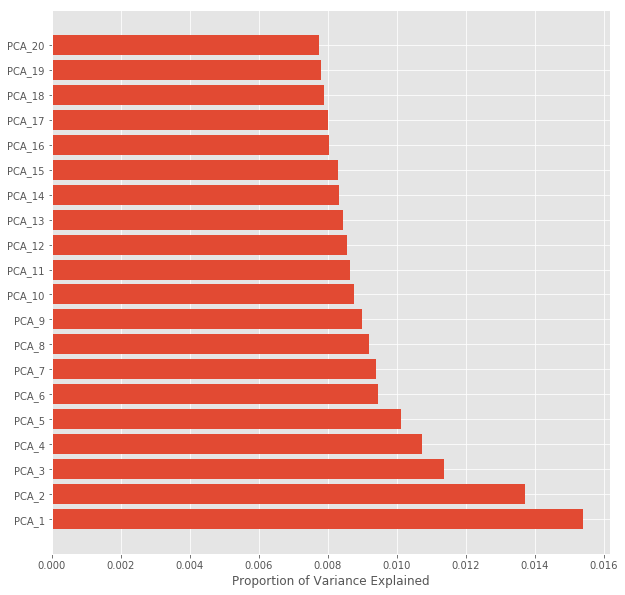

In [166]:
# bar plot

n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize = (10,10))
plt.barh(pca_range, pca.explained_variance_ratio_[:n_col_to_display], align = 'center')
xticks = plt.yticks(pca_range, pca_names)
plt.xlabel('Proportion of Variance Explained')


## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [ ]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

In [157]:
model_logit = LogisticRegression()
model_logit.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
# Get score for training set
model_logit.score(X_train_scaled, y_train)


1.0

In [159]:
# Get score for test set
model_logit.score(X_test_scaled,y_test)

0.7079324353217875

- Overfitted
- we have to use more data to train the model

#### Use (Stardardized + PCA) tf-idf vectors as features

In [161]:
# Build a Logistic Regression Classifier, train with PCA tranformed X
model_logit = LogisticRegression()
model_logit.fit(X_train_pca, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
# Get score for training set
model_logit.score(X_train_pca, y_train)


0.8008130081300813

In [163]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_logit.score(X_test_pca,y_test)

0.6974556339533889

#### Some findings:

- Using pca as new features, the difference between training error and testing error reduced.
- Better than using original features

#### Plot the coefficients against principal components


In [ ]:
pca_range = np.arange(pca.n_components_) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

df_coef = pd.DataFrame(list(zip(pca_names, model_logit.coef_.flatten()))).sort_values(by = [1], ascending = False)
df_coef.columns = ['PCs', 'coefficients']
df_coef

#### Plot the coefficients

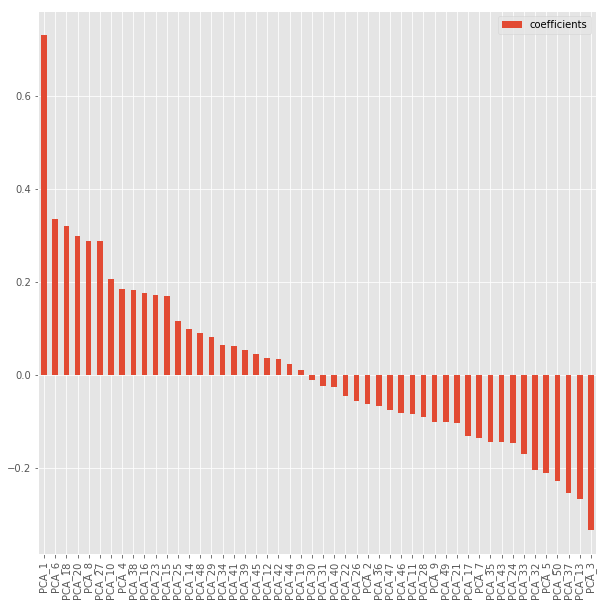

In [176]:
axis = df_coef.plot.bar(figsize = (10,10))
t = np.arange(pca.n_components_)
axis.set_xticks(t)
axis.set_xticklabels(df_coef['PCs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [180]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = None, n_estimators = 20, min_samples_leaf = 3, random_state = 7)
rf_clf.fit(X_train_scaled, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [181]:
# Get score for training set
rf_clf.score(X_train_scaled, y_train)

0.9105691056910569

In [182]:
# Get score for test set
rf_clf.score(X_test_scaled, y_test)

0.6809920889459055

#### Use (Stardardized + PCA) tf-idf vectors as features

In [183]:
# Build a Random Forest Classifier
rf_clf = RandomForestClassifier(max_depth = None, n_estimators = 20, min_samples_leaf = 3, random_state = 7)
rf_clf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [185]:
# Get score for training set
rf_clf.score(X_train_pca, y_train)

0.9878048780487805

In [186]:
# Get score for test set, REMEMBER to use PCA-transformed X!
rf_clf.score(X_test_pca, y_test)

0.6709429121231558

#### Q: What do you see from the training result and the test result?

A: Overfitting issues. As the test error is larger than training error.

#### You can plot the feature importances against principal components


In [187]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

In [190]:
df_coef = pd.DataFrame(list(zip(pca_names, rf_clf.feature_importances_))).sort_values(by = [1], ascending = False)
df_coef .columns = ['PCs', 'Feature Importance']
df_coef

,PCs,Feature Importance
2,PCA_3,0.058189
17,PCA_18,0.050795
5,PCA_6,0.049468
29,PCA_30,0.035501
32,PCA_33,0.034892
1,PCA_2,0.034139
4,PCA_5,0.032420
49,PCA_50,0.030998
26,PCA_27,0.026353
15,PCA_16,0.025847
